In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [54]:
df=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [55]:
df.shape

(1201, 10)

In [56]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


we use Categorical data ---> embedded feature

In [58]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [59]:
# for fixing yearbuilt
import datetime
datetime.datetime.now().year

2022

In [60]:
df["Total years"]=datetime.datetime.now().year-df["YearBuilt"]

In [61]:
df.drop("YearBuilt",axis=1,inplace=True)

In [62]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total years'],
      dtype='object')

In [63]:
# creating categorical data
a=cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_feature="SalePrice"

In [64]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [65]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [66]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [67]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [68]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,23
1456,0,3,85.0,13175,1,3,2073,0,210000,44
1457,6,3,66.0,9042,1,3,1188,1152,266500,81
1458,0,3,68.0,9717,1,3,1078,0,142125,72


> Categorical Feature-----

1.Label Encoding

2.take all categorical features---{numpy,torch}
1. take all continuous value
* 3.embediing layers

In [69]:
# staking and convert Into Tensors
cat_features=np.stack([df["MSSubClass"],df["MSZoning"],df["Street"],df["LotShape"]],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [70]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [71]:
# create continuous variable
cont_features=[]
for i in df.columns:
    if i not in a+["SalePrice"]:
        cont_features.append(i)
cont_features        


['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total years']

In [72]:
# stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [73]:
y=torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [75]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

**Embedding Layer ---->Embedding only for categorical data **

In [76]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]
cat_dims

[15, 5, 2, 4]

In [77]:
# ###Thumb rule ---->Output dimension should be setbased on the input dimension(min(50,feature dimenstion/2)) 
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [79]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [80]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))  

In [81]:
z=torch.cat(embedding_val,1)
z

tensor([[ 1.1741,  2.2795, -1.5688,  ...,  0.2348,  0.3954, -1.0163],
        [ 0.8730, -0.6051,  0.5915,  ...,  0.2348,  0.3954, -1.0163],
        [ 1.1741,  2.2795, -1.5688,  ...,  0.2348, -0.4844,  0.0863],
        ...,
        [ 0.8535,  1.7136, -0.7714,  ...,  0.2348,  0.3954, -1.0163],
        [ 0.8730, -0.6051,  0.5915,  ...,  0.2348,  0.3954, -1.0163],
        [ 0.8730, -0.6051,  0.5915,  ...,  0.2348,  0.3954, -1.0163]],
       grad_fn=<CatBackward0>)

In [82]:
dropout=nn.Dropout(.4)

In [83]:
final_embed=dropout(z)
final_embed

tensor([[ 1.9568,  3.7991, -0.0000,  ...,  0.0000,  0.6590, -1.6939],
        [ 0.0000, -0.0000,  0.0000,  ...,  0.3914,  0.6590, -1.6939],
        [ 0.0000,  0.0000, -0.0000,  ...,  0.3914, -0.8073,  0.1438],
        ...,
        [ 1.4225,  0.0000, -1.2857,  ...,  0.0000,  0.0000, -0.0000],
        [ 1.4550, -0.0000,  0.0000,  ...,  0.3914,  0.0000, -1.6939],
        [ 0.0000, -0.0000,  0.0000,  ...,  0.3914,  0.6590, -1.6939]],
       grad_fn=<MulBackward0>)

**Create feed forward**

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForward(nn.Module):
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)
        layerlist=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers=nn.Sequential(*layerlist)
    def forward(self,x_cat,x_cont):
        embedding=[]
        for i,e in enumerate(self.embeds):
            embedding.append(e(x_cat[:,i]))
        x=torch.cat(embedding,1)
        x=self.emb_drop(x)
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x
            

In [85]:
len(cont_features)

5

In [86]:
torch.manual_seed(100)
model=FeedForward(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [87]:
model

FeedForward(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [88]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [89]:
df.shape

(1201, 10)

In [90]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [91]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.421875
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200407.96875
Epoch number: 91 and the loss : 200383.4375
Epoch number: 101 and the loss : 200355.265625
Epoch number: 111 and the loss : 200322.25
Epoch number: 121 and the loss : 200291.375
Epoch number: 131 and the loss : 200252.21875
Epoch number: 141 and the loss : 200206.9375
Epoch number: 151 and the loss : 200163.3125
Epoch number: 161 and the loss : 200112.109375
Epoch number: 171 and the loss : 200059.25
Epoch number: 181 and the loss : 200006.078125
Epoch number: 191 and the loss : 199946.984375
Epoch number: 201 and the loss : 199881.1875
Epoch number: 211 and the loss : 199815.3125
Epoch number

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
losses= [ loss.detach().numpy() for loss in final_losses]

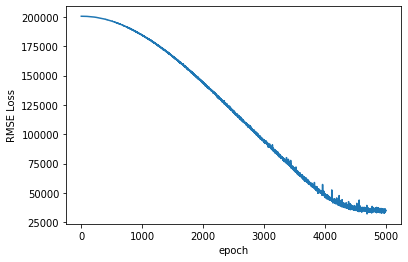

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

Validate the Test Data

In [96]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print("RMSE: {}".format(loss))    

RMSE: 40603.36328125


In [97]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [100]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,76270.523438
1,210813.296875
2,79172.085938
3,221826.203125
4,226678.218750
5,209487.687500
6,166694.250000
7,299234.593750
8,153693.718750
9,397910.968750


In [101]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,76270.523438,53729.476562
1,138887.0,210813.296875,-71926.296875
2,175500.0,79172.085938,96327.914062
3,195000.0,221826.203125,-26826.203125
4,142500.0,226678.218750,-84178.218750


In [102]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [103]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [105]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForward(embs_size,5,1,[100,50],p=0.4)

In [106]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [107]:
model1.eval()

FeedForward(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)